In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('Student_Performance.csv')
print(data.shape)
data = pd.get_dummies(data, columns=['Extracurricular Activities'], drop_first=True)
data.head()

(10000, 6)


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index,Extracurricular Activities_Yes
0,7,99,9,1,91.0,True
1,4,82,4,2,65.0,False
2,8,51,7,2,45.0,True
3,5,52,5,2,36.0,True
4,7,75,8,5,66.0,False


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Sleep Hours                       10000 non-null  int64  
 3   Sample Question Papers Practiced  10000 non-null  int64  
 4   Performance Index                 10000 non-null  float64
 5   Extracurricular Activities_Yes    10000 non-null  bool   
dtypes: bool(1), float64(1), int64(4)
memory usage: 400.5 KB


In [14]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [15]:
data.columns

Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced', 'Performance Index',
       'Extracurricular Activities_Yes'],
      dtype='object')

# Визуал

На диаграмме показаны часы учебы

<Axes: xlabel='Hours Studied', ylabel='count'>

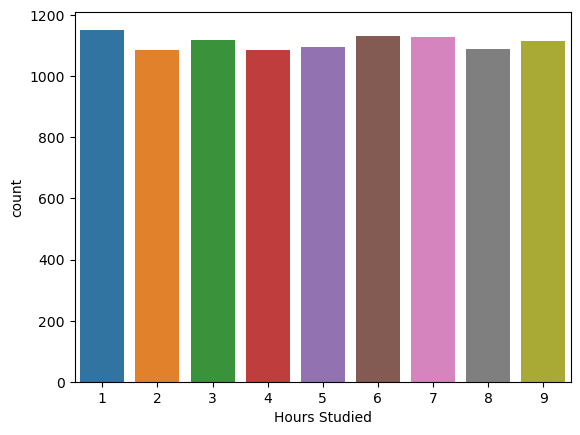

In [16]:
sns.countplot(data=data, x='Hours Studied')

Мы можем заметить, что кол-во учеников обучающихся 1-9 часов почти равно.

<Axes: xlabel='Hours Studied', ylabel='Performance Index'>

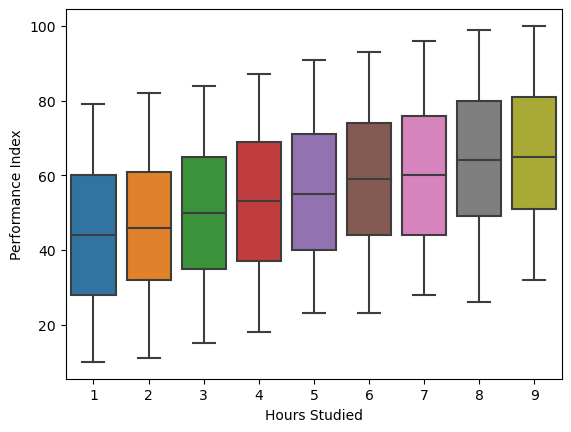

In [18]:
sns.boxplot(data=data, x='Hours Studied', y='Performance Index')

Данная диаграмма показывает прямую зависимость от часов учебы к успеваемости ученоков

# Линейная регрессия

In [19]:
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error, r2_score 

X = data[['Hours Studied', 
          'Previous Scores', 
          'Sleep Hours', 
          'Sample Question Papers Practiced', 
          'Extracurricular Activities_Yes']]  # Выделение независимых переменных
y = data['Performance Index']  # Выделение зависимой переменной

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42)  # Разделение данных на обучающий и тестовый наборы

In [20]:
model = LinearRegression()  # Создание модели линейной регрессии
model.fit(X_train, y_train)  # Обучение модели на обучающем наборе данных

LinearRegression()

In [21]:
y_pred = model.predict(X_test)

#### Вычисление средней квадратичной ошибки (MSE)
#### Вычисление коэффициента детерминации (R-squared)

In [22]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)  

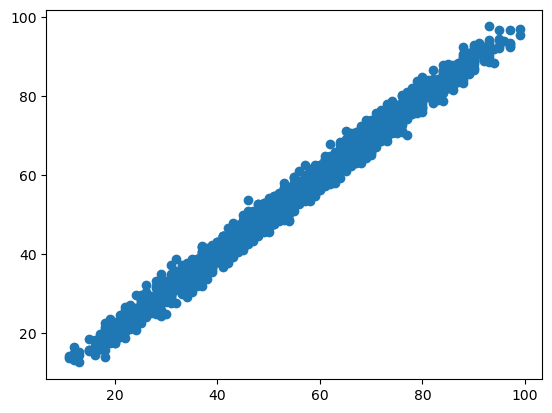

In [25]:
plt.scatter(y_test, y_pred)

In [23]:
print("Mean Squared Error:", mse)
print("R-squared:", r2)  

Mean Squared Error: 4.082628398521859
R-squared: 0.9889832909573145


## Модели с $L_1-$ и $L_2-$регуляризацией

### L1

In [39]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [ ]:
def gridsearch(X_train, y_train, model, params, scoring="neg_mean_squared_error", cv=5):
  """Перебор всевозможных гиперпараметров.

  :param X_train: объекты обучающей выборки
  :param y_train: значения целевой переменной обучающей выборки
  :param model: модель, для которой производится подбор гиперпараметров
  :param params: словарь с названиями гиперпараметрамов и всеми наборами значений
  :param scoring: функция, которая будет минимизироваться в ходе кросс-валидации
  :param cv: количество частей, на которые будет поделена выборка 

  :return: наилучшие гиперпараметры
  """ 
  searcher = RandomizedSearchCV(
      model, 
      params,
      scoring=scoring,
      cv=cv
  )
  searcher.fit(X_train, y_train)
  best_params = searcher.best_params_

  print("Best hyperparameters:", best_params)
  return best_params

def model_train_test(X_train, y_train, X_test, y_test, model):
  """Обучение и тестирование модели на обучающей и тестовой выборке соответственно.

  :param X_train: объекты обучающей выборки
  :param y_train: значения целевой переменной обучающей выборки
  :param X_test: объекты тестовой выборки
  :param y_test: значения целевой переменной тестовой выборки
  :param model: модель, которая обучается и тестируется
  """
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  mse = mean_squared_error(y_test, pred)
  r2 = r2_score(y_test, pred)
  print("MSE = {}; R2 = {}".format(round(mse, 3), round(r2, 3)))

  return pred, mse, r2

In [86]:
best_params_lasso = gridsearch(
    X_train, y_train,
    Lasso(),
    {
        "alpha": np.logspace(-2, 3, 21), # default = 1.0
        "tol": np.logspace(-5, 0, 21), # default=1e-4
     
    }
)

pred_lasso, mse_lasso, r2_lasso = model_train_test(
    X_train,
    y_train, 
    X_test, 
    y_test, 
    Lasso(**best_params_lasso)
)

Best hyperparameters: {'alpha': 0.01, 'tol': 0.05623413251903491}
MSE = 4.084; R2 = 0.989


### L2

In [36]:
from sklearn.linear_model import Ridge

In [87]:
best_params_ridge = gridsearch(
    X_train, y_train,
    Ridge(),
    {
        "alpha": np.logspace(-2, 3, 21), # default = 1.0
        "tol": np.logspace(-5, 0, 21), # default=1e-3
    }
)

pred_ridge, mse_ridge, r2_ridge = model_train_test(
    X_train, 
    y_train, 
    X_test, 
    y_test, 
    Ridge(**best_params_ridge)
)

Best hyperparameters: {'alpha': 10.0, 'tol': 1e-05}
MSE = 4.083; R2 = 0.989


# Визуал предсказаний(L1, L2, Линейная)

In [49]:
order = np.argsort(y_test.values)
y_test_ordered = y_test.values[order]
pred_lr_ordered = y_pred[order]
pred_ridge_ordered = pred_ridge[order]
pred_lasso_ordered = pred_lasso[order]

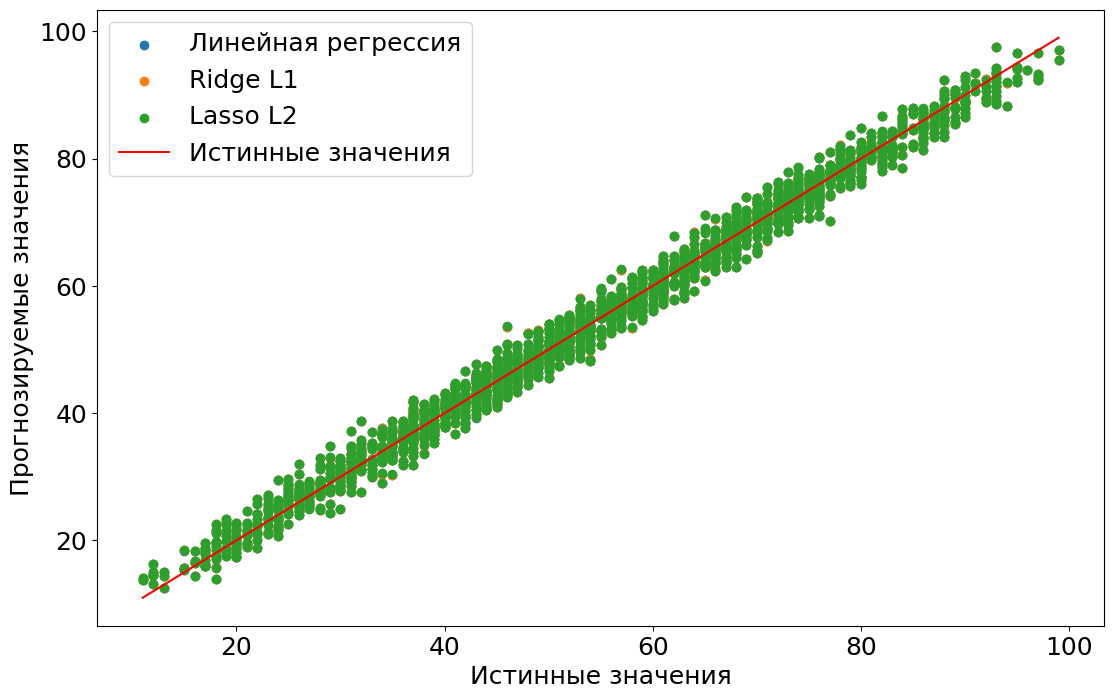

In [57]:
plt.rc('font', size=18) # далее во всех графиках будет использоваться такой же размер шрифта

plt.figure(figsize=(13, 8))

plt.scatter(y_test_ordered, pred_lr_ordered, label="Линейная регрессия")
plt.scatter(y_test_ordered, pred_ridge_ordered, label="Ridge L1")
plt.scatter(y_test_ordered, pred_lasso_ordered, label="Lasso L2")

plt.plot(y_test_ordered, y_test_ordered, label="Истинные значения", color="red")
plt.legend();

plt.xlabel("Истинные значения");
plt.ylabel("Прогнозируемые значения");

# Метод k-ближайших соседей

In [58]:
from sklearn.neighbors import KNeighborsRegressor

In [89]:
best_params_knn = gridsearch(
    X_train_new, y_train,
    KNeighborsRegressor(),
    {
        "n_neighbors": np.arange(1, 21), # default = 5
        "p": [1, 2], # default = 2
        "algorithm": ["auto", "ball_tree", "kd_tree", "brute"], # default = "auto"
    }
)

pred_knn, mse_knn, r2_knn = model_train_test(
    X_train, 
    y_train, 
    X_test, 
    y_test, 
    KNeighborsRegressor(**best_params_knn)
)

In [90]:
print("Mean Squared Error (KNN):", mse_knn)
print("R-squared (KNN):", r2_knn)

Mean Squared Error (KNN): 5.318051020408162
R-squared (KNN): 0.9856495828062124


## Визуал 

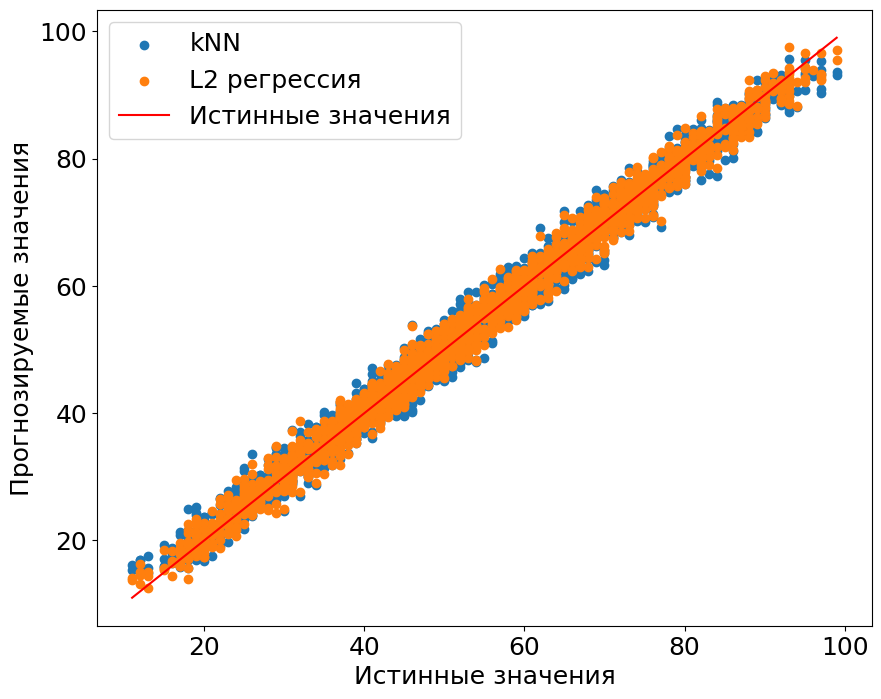

In [67]:
plt.figure(figsize=(10, 8))

plt.scatter(y_test_ordered, pred_knn[order], label="kNN")
plt.scatter(y_test_ordered, pred_lasso_ordered, label="L2 регрессия")

plt.plot(y_test_ordered, y_test_ordered, label="Истинные значения", color="red")
plt.legend();

plt.xlabel("Истинные значения");
plt.ylabel("Прогнозируемые значения");

# Решающие деревья

In [68]:
from sklearn.tree import DecisionTreeRegressor

In [91]:
best_params_dt = gridsearch(
    X_train, y_train,
    DecisionTreeRegressor(),
    {
        "max_depth": [None, 10] + [i for i in range(50, 351, 50)], # default = None
        "min_samples_leaf": [i for i in range(1, 41)], # default = 1
        "max_features": [None, "auto", "sqrt", "log2"] # default = None
    }
)

pred_dt, mse_dt, r2_dt = model_train_test(
    X_train, 
    y_train, 
    X_test, 
    y_test, 
    DecisionTreeRegressor(**best_params_dt)
)

Best hyperparameters: {'max_depth': 250, 'max_features': None, 'min_samples_leaf': 9}
MSE = 5.515; R2 = 0.985


F:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1800 fits failed out of a total of 7200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1800 fits failed with the following error:
Traceback (most recent call last):
  File "F:\anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "F:\anaconda\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "F:\anaconda\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "F:\anaconda\Lib\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_p

### Визуал

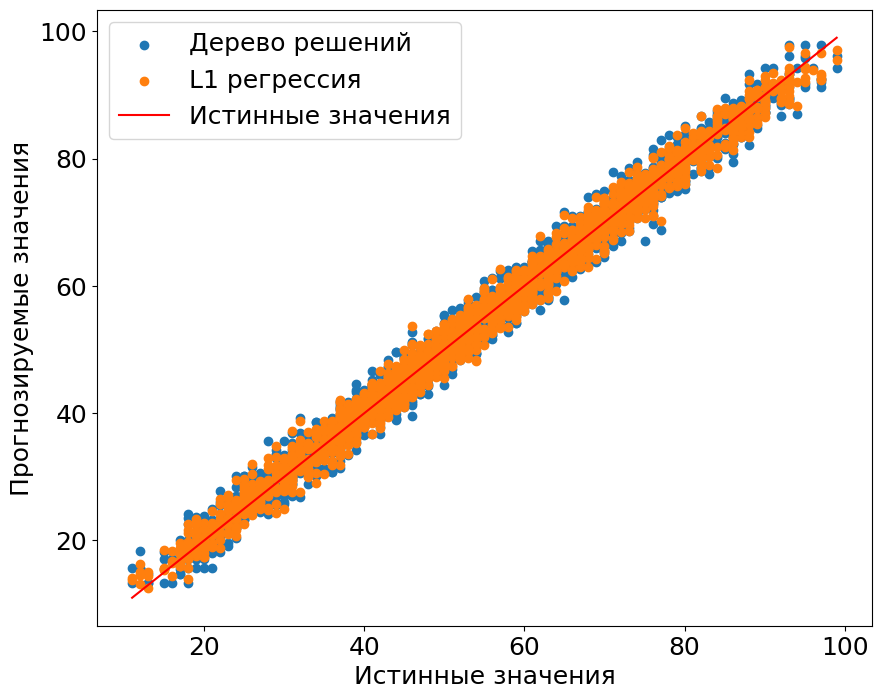

In [96]:
plt.figure(figsize=(10, 8))

plt.scatter(y_test_ordered, pred_dt[order], label="Дерево решений")
plt.scatter(y_test_ordered, pred_lasso_ordered, label="L1 регрессия")

plt.plot(y_test_ordered, y_test_ordered, label="Истинные значения", color="red")
plt.legend();

plt.xlabel("Истинные значения");
plt.ylabel("Прогнозируемые значения");

# Случайный лес

In [75]:
from sklearn.ensemble import RandomForestRegressor

In [92]:
best_params_rf = gridsearch(
    X_train, y_train,
    RandomForestRegressor(),
    {
        "max_depth": [None, 10] + [i for i in range(50, 351, 50)], # default = None
        "n_estimators": [i for i in range(50, 351, 50)], # default = 100
    }
)

pred_rf, mse_rf, r2_rf = model_train_test(
    X_train,
    y_train, 
    X_test, 
    y_test, 
    RandomForestRegressor(**best_params_rf)
)

Best hyperparameters: {'max_depth': 10, 'n_estimators': 300}
MSE = 4.723; R2 = 0.987


### Визуал


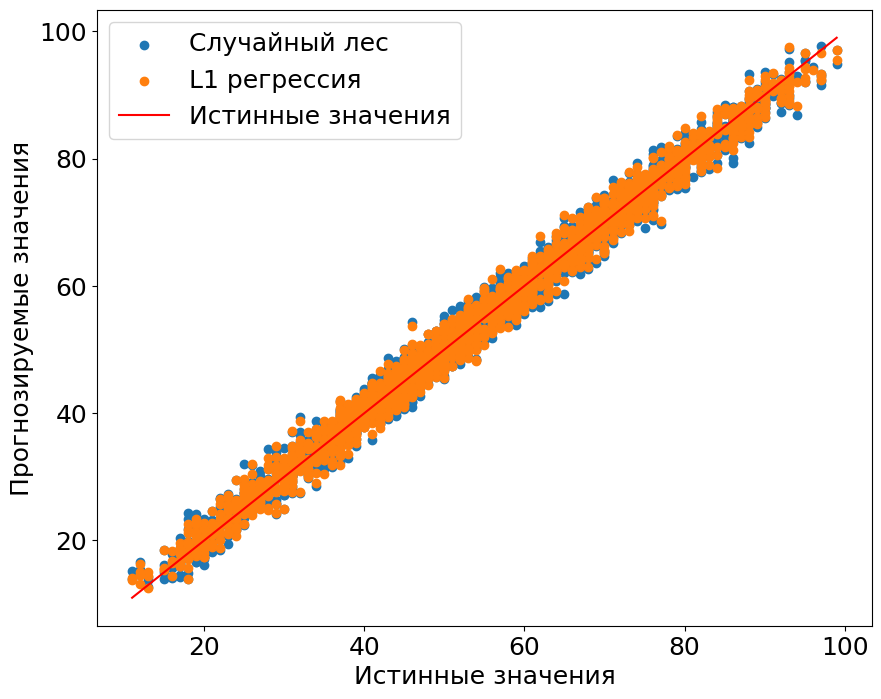

In [95]:
plt.figure(figsize=(10, 8))

plt.scatter(y_test_ordered, pred_rf[order], label="Случайный лес")
plt.scatter(y_test_ordered, pred_lasso_ordered, label="L1 регрессия")

plt.plot(y_test_ordered, y_test_ordered, label="Истинные значения", color="red")
plt.legend();

plt.xlabel("Истинные значения");
plt.ylabel("Прогнозируемые значения");

# Итоги

In [98]:
ans_df = pd.DataFrame()
ans_df["Model"] = ["Линейная регрессия", "Ridge L1", "Lasso L2", "kNN", "Дерево решений", "Случайный лес"]
ans_df["MSE"] = [mse, mse_ridge, mse_lasso, mse_knn, mse_dt, mse_rf]
ans_df["R2"] = [r2, r2_ridge, r2_lasso, r2_knn, r2_dt, r2_rf]

In [99]:
ans_df.sort_values(by=["MSE"], ascending=True).sort_values(by=["R2"], ascending=False)

,Model,MSE,R2
0,Линейная регрессия,4.082628,0.988983
1,Ridge L1,4.082730,0.988983
2,Lasso L2,4.084345,0.988979
5,Случайный лес,4.723407,0.987254
3,kNN,5.318051,0.985650
4,Дерево решений,5.514938,0.985118


### Таким образом, судя по $R^2$, почти все модели демонстрируют неплохое качество, но в данном случае наиболее хорошо себя проявил линейная регрессия.